In [1]:
# I hope everyone would be done with CAPM model till now. Now, let's begin with writing the code of CAPM model on Jupyter notebook.

# Most of you would still required time to get familiar with Python, but try coding alongside.
# Implementation of CAPM model using python.

# Importing all the libraries.
# Use Yahoo Finance as a data source.
# Analyse the price of any stocks of your choice.
# Take the other index as Nifty 50/ Sensex (return for beta= 1)
# Feed the data from Jan 1’21 to Jan 1’22 and predict the stock price on any date(6th June'22)
 
# Follow the steps, as explained in the class:
# Plot the adjusted close price of any 2 stock and use linear regression for finding alpha and beta.

## Importing the necessary libraries

In [2]:
# pip install pandas-datareader

In [95]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import pandas_datareader.data as web
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [4]:
start = datetime.date(day=1,month=1,year=2021)
end = datetime.date(day=1,month=1,year=2022)

## Reading stock data using Data Reader

In [5]:
df = web.DataReader(name = 'AAPL',data_source = 'yahoo',start = start,end=end)

In [6]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,131.515976
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.264984
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,129.850830
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.479851
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,129.761642
...,...,...,...,...,...,...
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,179.836319
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,178.799164
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,178.888916


In [7]:
df2 = web.DataReader(name = '^GSPC',data_source = 'yahoo',start = start,end=end)

In [8]:
df2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,3760.199951,3726.879883,3733.270020,3756.070068,3172510000,3756.070068
2021-01-04,3769.989990,3662.709961,3764.610107,3700.649902,5006680000,3700.649902
2021-01-05,3737.830078,3695.070068,3698.020020,3726.860107,4582620000,3726.860107
2021-01-06,3783.040039,3705.340088,3712.199951,3748.139893,6049970000,3748.139893
2021-01-07,3811.550049,3764.709961,3764.709961,3803.790039,5080870000,3803.790039
...,...,...,...,...,...,...
2021-12-27,4791.490234,4733.990234,4733.990234,4791.189941,2264120000,4791.189941
2021-12-28,4807.020020,4780.040039,4795.490234,4786.350098,2217050000,4786.350098
2021-12-29,4804.060059,4778.080078,4788.640137,4793.060059,2369370000,4793.060059


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
df.index

DatetimeIndex(['2020-12-31', '2021-01-04', '2021-01-05', '2021-01-06',
               '2021-01-07', '2021-01-08', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14',
               ...
               '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None)

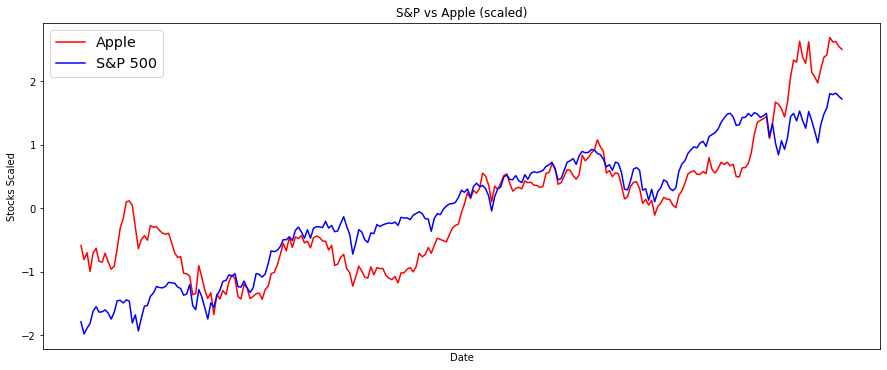

In [12]:
# Plotting the scaled returns
plt.figure(figsize=(15,6))
plt.xticks(ticks=[])
plt.plot(scaler.fit_transform(df[['Adj Close']]),'r',label='Apple',)
plt.plot(scaler.fit_transform(df2[['Adj Close']]),'b',label='S&P 500')
plt.legend(loc="upper left",fontsize='x-large')
plt.xlabel("Date")
plt.ylabel("Stocks Scaled")
plt.title("S&P vs Apple (scaled)")
plt.show()

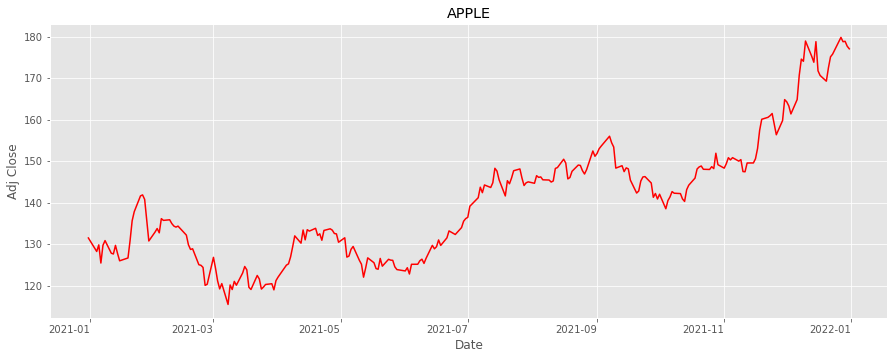

In [13]:
# Apple daily closing prices
plt.style.use('ggplot')
df['Adj Close'].plot(figsize=(15,6),title='APPLE',grid=True, xlabel='Date',rot='horizontal', ylabel='Adj Close',style='r')
plt.show()

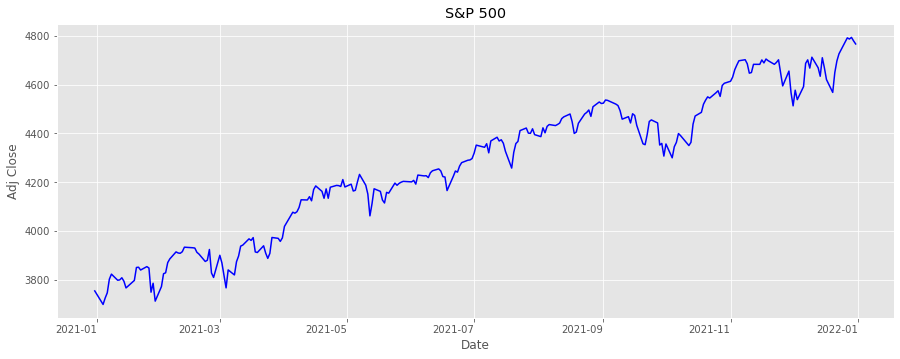

In [14]:
df2['Adj Close'].plot(figsize=(15,6),title='S&P 500',grid=True, xlabel='Date',rot='horizontal', ylabel='Adj Close',style=['b'])
plt.show()

In [29]:
# Plot cummulative returns
df['Cummulative_Returns(%)'] = ((df['Adj Close']-df['Adj Close'][0])/df['Adj Close'][0])*100
df2['Cummulative_Returns(%)'] = ((df2['Adj Close']-df2['Adj Close'][0])/df2['Adj Close'][0])*100

In [30]:
df

,High,Low,Open,Close,Volume,Adj Close,Cummulative_Returns,Cummulative_Returns(%)
Date,,,,,,,,
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,131.515976,0.000000,0.000000
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.264984,-0.024719,-2.471937
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,129.850830,-0.012661,-1.266117
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.479851,-0.045897,-4.589652
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,129.761642,-0.013339,-1.333932
...,...,...,...,...,...,...,...,...
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,179.836319,0.367410,36.741044
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,178.799164,0.359524,35.952429
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,178.888916,0.360207,36.020673


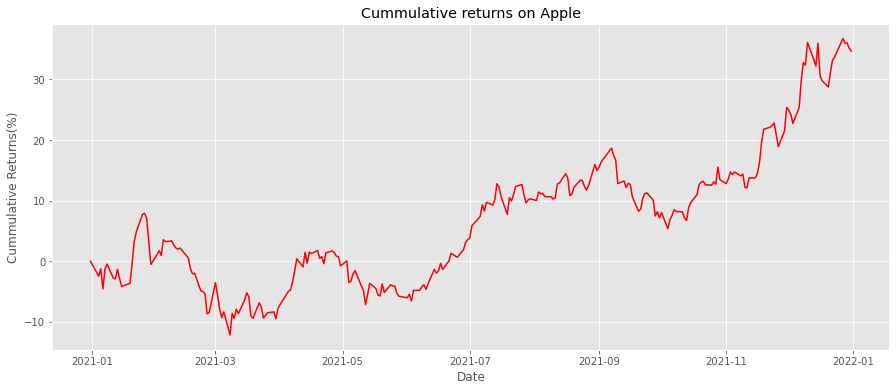

In [39]:
plt.figure(figsize=(15,6))
plt.plot(df['Cummulative_Returns(%)'],'r')
plt.title("Cummulative returns on Apple")
plt.ylabel('Cummulative Returns(%)')
plt.xlabel('Date')
plt.show()

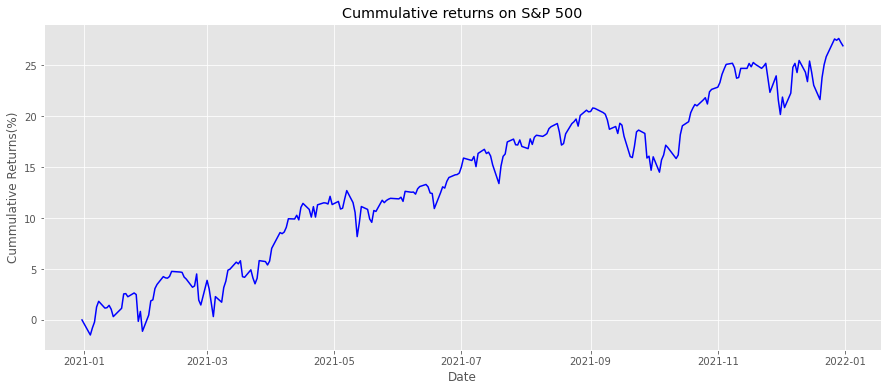

In [42]:
plt.figure(figsize=(15,6))
plt.plot(df2['Cummulative_Returns(%)'],'b')
plt.title("Cummulative returns on S&P 500")
plt.ylabel('Cummulative Returns(%)')
plt.xlabel('Date')
plt.show()

## Calculating the returns on stocks

##### Importing all the libraries.
##### Use DateTime library to take start and end time of stock (first try with 1jan’21 to 1 Jan’22)
##### Use web.Datareader library to export Yahoo Finance as a data source. 
##### Take the stock for comparison of market return to be nifty(^NSEI) (beta=1).
##### Take the other stock on basis of your choice. (say, Bajaj FinServ)
##### Try plotting the absolute value of stock price of both stock in same graph.
##### Now plot cumulative return. (In simple word, assume you invested Rs.1 in both stock, so what would be its value on any day). Plot and visualize.
##### Now, add another column for daily returns. (Curr-Prev/prev).
##### Now, plot the scatter graph of daily return of both the stocks.
#####  Use Linear Regression to find the value of alpha, beta, rvalue, pvalue, stderr. (alpha = intercept, beta=slope).
##### Now find the price at any time for the stock you choose before (say, 8June’22)
##### Now, using CAPM formula, find the value of theoretical return of that asset.
##### Now, you get expected price and original price. Find the error in this.

In [43]:
df['Shifted_Adj_Close'] = df['Adj Close'].shift(1)
df2['Shifted_Adj_Close'] = df2['Adj Close'].shift(1)

In [44]:
df['Returns(%)'] = (df['Shifted_Adj_Close']-df['Adj Close'])/(df['Shifted_Adj_Close'])*100

In [45]:
df2['Returns(%)'] = (df2['Shifted_Adj_Close']-df2['Adj Close'])/(df2['Shifted_Adj_Close'])*100

In [46]:
df = df[1:]

In [47]:
df2 = df2[1:]

In [48]:
df

,High,Low,Open,Close,Volume,Adj Close,Cummulative_Returns,Cummulative_Returns(%),Shifted_Adj_Close,Returns(%)
Date,,,,,,,,,,
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.264984,-0.024719,-2.471937,131.515976,2.471937
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,129.850830,-0.012661,-1.266117,128.264984,-1.236383
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.479851,-0.045897,-4.589652,129.850830,3.366154
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,129.761642,-0.013339,-1.333932,125.479851,-3.412334
2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0,130.881638,-0.004823,-0.482328,129.761642,-0.863117
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,179.836319,0.367410,36.741044,175.797394,-2.297489
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,178.799164,0.359524,35.952429,179.836319,0.576722
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,178.888916,0.360207,36.020673,178.799164,-0.050197


## Estimating the Beta coefficient

In [49]:
df3 = pd.merge(df, df2, on = "Date", how = "inner")

In [50]:
df3

,High_x,Low_x,Open_x,Close_x,Volume_x,Adj Close_x,Cummulative_Returns,Cummulative_Returns(%)_x,Shifted_Adj_Close_x,Returns(%)_x,High_y,Low_y,Open_y,Close_y,Volume_y,Adj Close_y,Cummulative_Returns(%)_y,Shifted_Adj_Close_y,Returns(%)_y
Date,,,,,,,,,,,,,,,,,,,
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.264984,-0.024719,-2.471937,131.515976,2.471937,3769.989990,3662.709961,3764.610107,3700.649902,5006680000,3700.649902,-1.475483,3756.070068,1.475483
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,129.850830,-0.012661,-1.266117,128.264984,-1.236383,3737.830078,3695.070068,3698.020020,3726.860107,4582620000,3726.860107,-0.777673,3700.649902,-0.708260
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.479851,-0.045897,-4.589652,129.850830,3.366154,3783.040039,3705.340088,3712.199951,3748.139893,6049970000,3748.139893,-0.211130,3726.860107,-0.570984
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,129.761642,-0.013339,-1.333932,125.479851,-3.412334,3811.550049,3764.709961,3764.709961,3803.790039,5080870000,3803.790039,1.270476,3748.139893,-1.484740
2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0,130.881638,-0.004823,-0.482328,129.761642,-0.863117,3826.689941,3783.600098,3815.050049,3824.679932,4764180000,3824.679932,1.826640,3803.790039,-0.549186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,179.836319,0.367410,36.741044,175.797394,-2.297489,4791.490234,4733.990234,4733.990234,4791.189941,2264120000,4791.189941,27.558588,4725.790039,-1.383894
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,178.799164,0.359524,35.952429,179.836319,0.576722,4807.020020,4780.040039,4795.490234,4786.350098,2217050000,4786.350098,27.429734,4791.189941,0.101015
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,178.888916,0.360207,36.020673,178.799164,-0.050197,4804.060059,4778.080078,4788.640137,4793.060059,2369370000,4793.060059,27.608377,4786.350098,-0.140190


In [51]:
df3 = df3[['Returns(%)_x','Returns(%)_y']]

### Linear Regression

In [76]:
X = df3[['Returns(%)_x']]
y = df3['Returns(%)_y']
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [96]:
x1 = sm.add_constant(x)
results = sm.OLS(y,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Returns(%)_y   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     222.2
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           2.21e-36
Time:                        17:58:07   Log-Likelihood:                -228.54
No. Observations:                 252   AIC:                             461.1
Df Residuals:                     250   BIC:                             468.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0512      0.038     -1.346      0.179      -0.126       0.024
Returns(%)_x     0.3580      0.024     14.906      0.000       0.311       0.405
==============================================================================
Omnibus:                       35.026   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.482
Skew:                           0.471   Prob(JB):                     6.27e-30
Kurtosis:                       6.453   Cond. No.                         1.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
beta = reg.coef_
alpha = reg.intercept_
print(beta)
print(alpha)

[0.35798346]
-0.05120908696796202


In [72]:
x = df3['Returns(%)_x']
y = df3['Returns(%)_y']

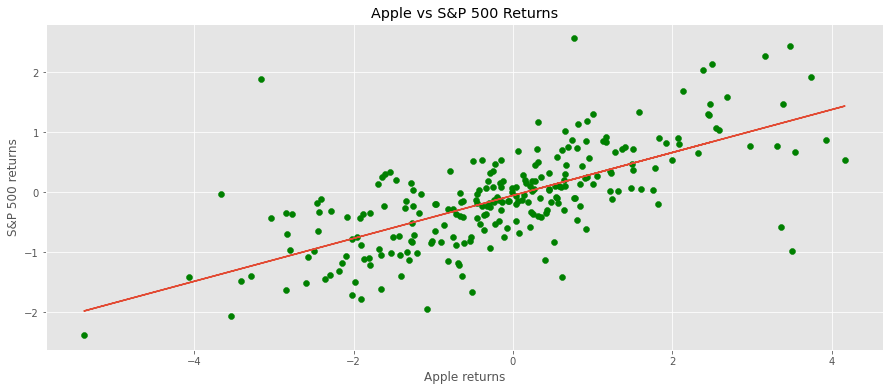

In [75]:
plt.figure(figsize=(15,6))
plt.scatter(x = df3['Returns(%)_x'],y = df3['Returns(%)_y'],c='g')
plt.title("Apple vs S&P 500 Returns")
plt.plot(x,beta*x+alpha)
plt.xlabel("Apple returns")
plt.ylabel("S&P 500 returns")
plt.show()

## Predicting stock returns

Predicting the returns on 8th June 2022 using the equation

#### Returns on the stock = alpha + beta*(Returns on market)

In [100]:
Adj_Close = web.DataReader(name = '^GSPC',data_source = 'yahoo',start = '06-08-2022',end='06-09-2022')['Adj Close']

In [101]:
Adj_Close

Date
2022-06-07    4160.680176
2022-06-08    4115.770020
Name: Adj Close, dtype: float64

In [102]:
R_m = ((Adj_Close[1]-Adj_Close[0])/(Adj_Close[1]))*100

In [103]:
R_m

-1.0911726368791343

In [113]:
R_pred = reg.predict([[R_m]])[0]

In [114]:
R_pred

-0.4418308454693875

In [105]:
Adj_stock = web.DataReader(name = 'AAPL',data_source = 'yahoo',start = '06-08-2022',end='06-09-2022')['Adj Close']

In [106]:
Adj_stock

Date
2022-06-07    148.710007
2022-06-08    147.960007
Name: Adj Close, dtype: float64

In [115]:
R_act = ((Adj_stock[1]-Adj_stock[0])/(Adj_stock[1]))*100

In [116]:
R_act

-0.5068937320680102

## The error in the forecast

In [124]:
R_act - R_pred

-0.06506288659862275

In [126]:
print(f"Error in the forecast is {(R_act - R_pred).round(2)}%")

Error in the forecast is -0.07%
